In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Load the dataset into python environment

In [742]:
data=pd.read_csv('C:\\Users\\91735\\Downloads\\titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [743]:
df=pd.read_csv('C:\\Users\\91735\\Downloads\\titanic_dataset.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [744]:
df.shape

(891, 11)

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [746]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [747]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 people 342 people survived in the incident and 549 were unsurvived

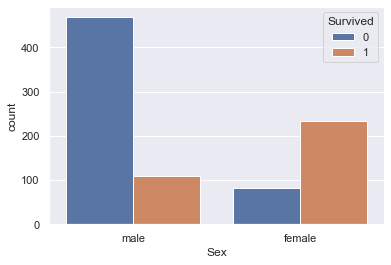

In [748]:
sns.countplot(data=df,x='Sex',hue='Survived')
sns.set(style='darkgrid')

no of females survived is higher than males

# 4. Fill in all the missing values present in all the columns in the dataset

In [749]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

we can see that age,cabin and embarked contains null values

   and cabin contains null values more than half of the dataset ,so it is better to drop cabin column

In [750]:
df=df.drop(columns='Cabin',axis=1)

In [751]:
df.dtypes[['Age','Embarked']]

Age         float64
Embarked     object
dtype: object

embarked have object data typesand age have floating point data type

In [752]:
##filling the missing values
for i in['Age','Embarked']:
     if(i=='Age'):
        df[i]=df[i].fillna(df[i].median())
     else:
        df[i].fillna(df[i].mode()[0], inplace=True)

In [753]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [754]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 5. Check and handle outliers in at least 3 columns in the dataset

a)outlier handling in 'Fare'

Text(0.5, 1.0, 'boxplot of Fare before handling outlier')

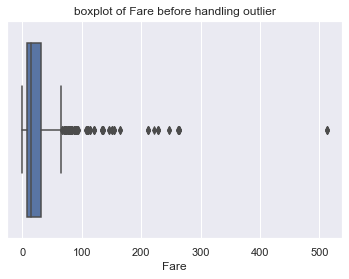

In [755]:
sns.boxplot(df['Fare'],data=df)
plt.title('boxplot of Fare before handling outlier')

The graph shows the presence of outliers in Fare

<AxesSubplot:>

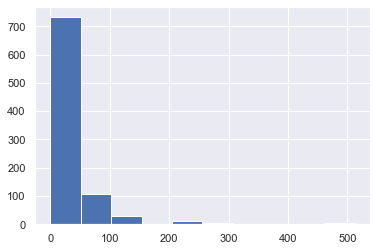

In [756]:
df['Fare'].hist()

In [757]:
##finding IQR
Q1 = np.percentile(df['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(df['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(df['Fare'],75,interpolation='midpoint')
print('Q1=',Q1,'\nQ2=',Q2,'\nQ3=',Q3)

Q1= 7.9104 
Q2= 14.4542 
Q3= 31.0


In [758]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('IQR=',IQR,'\nlow_lim=',low_lim,'\nup_lim=',up_lim)

IQR= 23.0896 
low_lim= -26.724 
up_lim= 65.6344


In [759]:
##finding outlier value
outlier = []
for x in df['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [760]:
df["Fare"].where(df["Fare"] >=l_lim,l_lim, inplace=True)
df["Fare"].where(df["Fare"] <=u_lim,u_lim, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


Text(0.5, 1.0, 'boxplot of Fare after handling outlier')

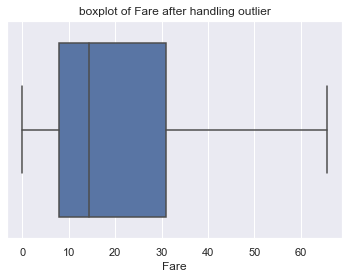

In [761]:
sns.boxplot(df['Fare'],data=df)
plt.title('boxplot of Fare after handling outlier')

We can see that outliers are removed

b)outlier handling in 'Age'

Text(0.5, 1.0, 'boxplot of age before handling outlier')

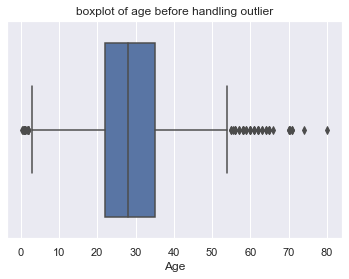

In [762]:
sns.boxplot(df['Age'],data=df)
plt.title('boxplot of age before handling outlier')

The graph shows the presence of outliers in age

<AxesSubplot:>

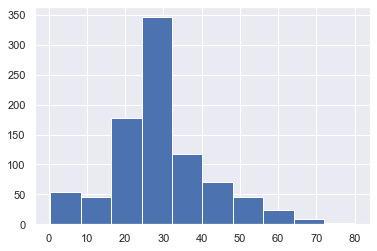

In [763]:
df['Age'].hist()

In [764]:
##finding IQR
Q1 = np.percentile(df['Age'],25,interpolation='midpoint')
Q2 = np.percentile(df['Age'],50,interpolation='midpoint')
Q3 = np.percentile(df['Age'],75,interpolation='midpoint')
print('Q1=',Q1,'\nQ2=',Q2,'\nQ3=',Q3)

Q1= 22.0 
Q2= 28.0 
Q3= 35.0


In [765]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('IQR=',IQR,'\nlow_lim=',low_lim,'\nup_lim=',up_lim)

IQR= 13.0 
low_lim= 2.5 
up_lim= 54.5


In [766]:
##finding outlier value
outlier = []
for x in df['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [767]:
df["Age"].where(df["Age"] >=l_lim,l_lim, inplace=True)
df["Age"].where(df["Age"] <=u_lim,u_lim, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


Text(0.5, 1.0, 'boxplot of age after handling outlier')

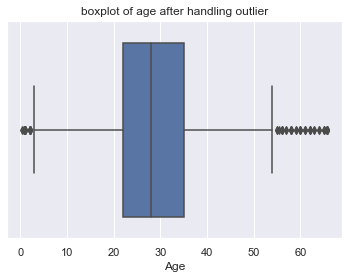

In [768]:
sns.boxplot(df['Age'],data=df)
plt.title('boxplot of age after handling outlier')

c)outlier handling in 'SibSp'

Text(0.5, 1.0, 'boxplot of sibsp before handling outlier')

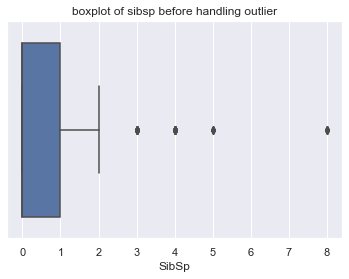

In [769]:
sns.boxplot(df['SibSp'],data=df)
plt.title('boxplot of sibsp before handling outlier')

In [770]:
##finding IQR
Q1 = np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(df['SibSp'],75,interpolation='midpoint')
print('Q1=',Q1,'\nQ2=',Q2,'\nQ3=',Q3)

Q1= 0.0 
Q2= 0.0 
Q3= 1.0


In [771]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('IQR=',IQR,'\nlow_lim=',low_lim,'\nup_lim=',up_lim)

IQR= 1.0 
low_lim= -1.5 
up_lim= 2.5


In [772]:
##finding outlier value
outlier = []
for x in df['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
print(outlier)

[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [773]:
df["SibSp"].where(df["SibSp"] >=l_lim,l_lim, inplace=True)
df["SibSp"].where(df["SibSp"] <=u_lim,u_lim, inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


Text(0.5, 1.0, 'boxplot of sibsp after handling outlier')

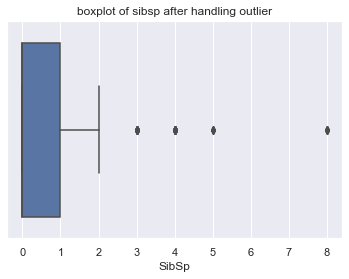

In [774]:
sns.boxplot(df['SibSp'],data=df)
plt.title('boxplot of sibsp after handling outlier')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [775]:
dat=df['Survived']

In [776]:
dat

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [777]:
dat.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [778]:
import numpy as np
from sklearn import preprocessing
standardise=preprocessing.StandardScaler()
dat=np.array(dat).reshape(-1,1)
dat = standardise.fit_transform(dat)
dat=pd.DataFrame(dat)
dat.rename(columns = {0:'Survived'}, inplace = True)
dat #after standard scaling

,Survived
0,-0.789272
1,1.266990
2,1.266990
3,1.266990
4,-0.789272
...,...
886,-0.789272
887,1.266990
888,-0.789272
889,1.266990


In [779]:
dat.describe().round(2)

,Survived
count,891.00
mean,-0.00
std,1.00
min,-0.79
25%,-0.79
50%,-0.79
75%,1.27
max,1.27
